DATA620 Week Six - Assignment Data Sets

Ivan  Tikhonov
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:
Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  

In [1]:
import networkx as net

In [2]:
g = net.davis_southern_women_graph()

In [3]:
import networkx.algorithms.bipartite as bipartite

In [4]:
women = g.graph['top']
clubs = g.graph['bottom']

In [5]:
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [6]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [7]:
import matplotlib.pyplot as plot

In [8]:
matplotlib inline

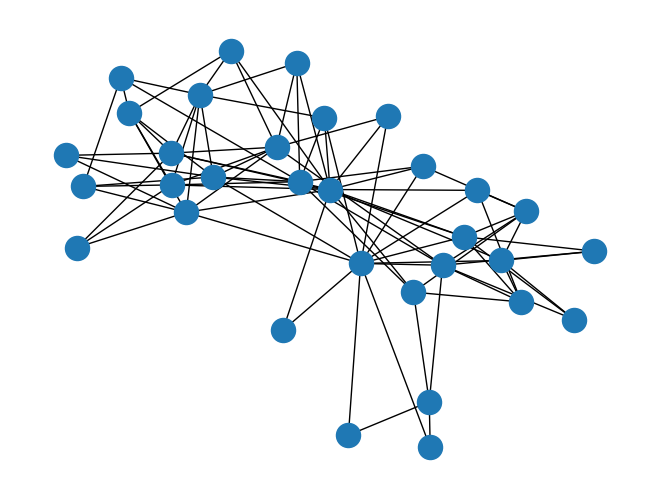

In [9]:
#look at the network diagram
net.draw(g)

In [10]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(g,women,clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


C:\Users\Ivant\AppData\Local\Temp\ipykernel_12172\1241979798.py:2: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(bipartite.biadjacency_matrix(g,women,clubs))


In [11]:
#project the bipartate graph onto women nodes
W = bipartite.projected_graph(g, women)

#project the bipartate graph onto club nodes
C = bipartite.projected_graph(g, clubs)

In [12]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W2 = bipartite.weighted_projected_graph(g, women)

#do the same for club nodes
C2 = bipartite.weighted_projected_graph(g, clubs)

Evaluate Degree Centrality for the bipartite graph (unweighted)

Projected on Women: In this case the degree for a particular member is equal to the number of other members with whom they have attended at least one other meeting.

Projected on clubs: In this case the degree for a particular club is the number of other clubs that share at least one club member.

In [13]:
print('') 
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [14]:
#show degree for each club
print('') 
print("#Mutual members of at least one other club, Club")
for c in clubs:
    print('%d %s' % (C.degree(c),c))


#Mutual members of at least one other club, Club
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14


Evaluate Degree Centrality for the weighted bipartite graph

Projected on Women: In this case the degree for a particular member is equal to the number of club meetings that they have attended with another member.

Projected on clubs: In this case the degree for a particular club is the number of members of other clubs where the member is a member of their club and the other club.

In [15]:
#show weighted degree for each member - the number of meetings they attended together
print('') 
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W2.degree(w,weight='weight'),w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [16]:
print('') 
print("#All mutual members of other clubs, Club")
for c in clubs:
    print('%d %s' % (C2.degree(c,weight='weight'),c))


#All mutual members of other clubs, Club
19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


Based on this analysis there are many women who attend multiple clubs together, 
and there are many clubs attended by many of the same women.
This set of women and clubs appears to be very interconnected with a lot of crossover.